# Creating figure 2
This notebook generates figure 2 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape

In [33]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)

In [34]:
a = AnalysisTools('fig_2_data/knp_long_with_ca_low_res_ecsfrac_6.h5')

In [35]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01

In [39]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6
t_idx = 500
print a.time_series[t_idx]
zm = zmid

1.0


In [63]:
Z_diff = np.zeros([N,N])

ion_idx = 4

k = t_idx
u = Function(a.W)
c = Function(a.V)
a.hdf.read(u, '/solution/vector_'+str(k))
c.assign(project(u.sub(ion_idx), a.V))
for i,x in enumerate(x_array):
    for j,y in enumerate(y_array):
        p = Point(x,y,zm)
        Z_diff[j,i] = c(p)

<IPython.core.display.Javascript object>


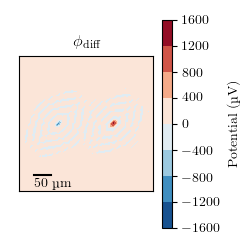

In [64]:
plt.figure(figsize=(2.5,2.5))
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-1.2, 1.2, 20)
plt.contourf(X,Y,1e6*(Z_diff), cmap='RdBu_r')
plt.axis('image')
cbar = plt.colorbar()
cbar.set_label(r'Potential (\textmu V)')
# plt.xlabel(r'$x$-position ($\mu$m)')
# plt.ylabel(r'$y$-position ($\mu$m)')
plt.title(r'$\phi_{\mathrm{diff}}$')
plt.xticks([])
plt.yticks([])
plt.axis('image')
plt.plot([50,100], [50,50], 'k')
plt.text(50,15, r'50 \textmu m')
plt.tight_layout()
plt.savefig('phi_diff.pdf')
plt.show()

In [65]:
Z_vc = np.zeros([N,N])

ion_idx = 5

k = t_idx
u = Function(a.W)
c = Function(a.V)
a.hdf.read(u, '/solution/vector_'+str(k))
c.assign(project(u.sub(ion_idx), a.V))
for i,x in enumerate(x_array):
    for j,y in enumerate(y_array):
        p = Point(x,y,zm)
        Z_vc[j,i] = c(p)
        

<IPython.core.display.Javascript object>


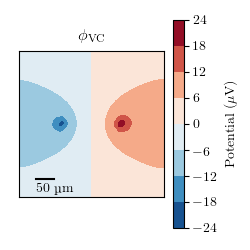

In [50]:
plt.figure(figsize=(2.5,2.5) )
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-23, 23, 20)
plt.contourf(X,Y,1e6*(Z_vc), cmap='RdBu_r')
# plt.axis('image')
cbar = plt.colorbar()
cbar.set_label(r'Potential ($\mu$V)')
# plt.xlabel(r'$x$-position ($\mu$m)')
# plt.ylabel(r'$y$-position ($\mu$m)')
plt.xticks([])
plt.yticks([])
plt.axis('image')
plt.plot([50,100], [50,50], 'k')
plt.text(50,15, r'50 \textmu m')
plt.title(r'$\phi_{\mathrm{VC}}$')
plt.tight_layout()
plt.savefig('phi_vc.pdf')
plt.show()

-1297.49292885
-23.3941051392
-1274.09882371
1298.12387288
23.3666949668
1274.75717791


<IPython.core.display.Javascript object>


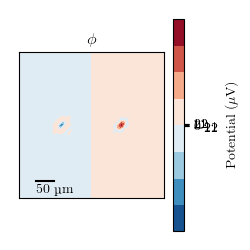

In [51]:
Z = Z_vc+Z_diff
print np.min(Z*1e6)
print np.min(Z_vc*1e6)
print np.min(Z_diff*1e6)

print np.max(Z*1e6)
print np.max(Z_vc*1e6)
print np.max(Z_diff*1e6)

plt.figure(figsize=(2.5,2.5))
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-23, 23, 20)
plt.contourf(X,Y,1e6*(Z_vc+Z_diff), cmap='RdBu_r')
# plt.axis('image')
cbar = plt.colorbar(ticks=[-22, -11, 0, 11, 22])
cbar.set_label(r'Potential ($\mu$V)')
# plt.xlabel(r'$x$-position ($\mu$m)')
# plt.ylabel(r'$y$-position ($\mu$m)')
plt.xticks([])
plt.yticks([])
plt.axis('image')
plt.plot([50,100], [50,50], 'k')
plt.text(50,15, r'50 \textmu m')
plt.title(r'$\phi$')
plt.tight_layout()
plt.savefig('phi.pdf')
plt.show()

In [47]:
# p1 = Point(50e-6, 100e-6, 10e-6)
# p2 = Point(150e-6, 100e-6, 10e-6)

p1 = Point(120e-6, 200e-6, 10e-6)
p2 = Point(280e-6, 200e-6, 10e-6)

In [ ]:
phi_knp_membcurr_list = []
phi_knp_diff_list = []
u_knp = Function(a.W)
phi_knp = Function(a.V)
nStep = 1
for i in range(0,len(a.time_series),nStep): 
    if(i%10 == 0):
        print(i)
    a.hdf.read(u_knp, '/solution/vector_'+str(i))
    phi_knp.assign(project(u_knp.sub(a.N+1), a.V))
    phi_knp_membcurr_list.append(phi_knp(p1) - phi_knp(p2))
    phi_knp.assign(project(u_knp.sub(a.N), a.V))
    phi_knp_diff_list.append(phi_knp(p1) - phi_knp(p2))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330

In [ ]:
phi_diff = 1e6*(np.array(phi_knp_diff_list))
phi_vc = 1e6*np.array(phi_knp_membcurr_list)

phi = phi_diff + phi_vc
fig, ax = plt.subplots(figsize=(2.3,2.3))
ax.yaxis.tick_right()
plt.plot(a.time_series[1:],phi[1:], label=r'$\phi$')
plt.plot(a.time_series[1:],phi_vc[1:], label=r'$\phi_\mathrm{VC}$')
plt.xlabel(r"time (s)")
ax.set_ylabel(r"$\Delta \phi$ (\textmu V)")
ax.yaxis.set_label_position("right")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('phi_time.pdf')
plt.show()

In [13]:
print a.mesh.num_cells()
print a.mesh.num_vertices()

27000
5766


In [24]:
a.hdf.read(u, '/solution/vector_'+str(1))
c.assign(project(u.sub(3), a.V))
ex = Expression('x[0] <= 200e-6', degree=4)
x1 = assemble(c*ex*dx)
print x1

4.8248990565e-12


In [29]:
a.hdf.read(u, '/solution/vector_'+str(10))
c.assign(project(u.sub(3), a.V))
ex = Expression('x[0] <= 200e-6', degree=4)
x2 = assemble(c*ex*dx)
print x2

4.82498652222e-12


In [30]:
print x2-x1

8.74657229558e-17


In [31]:
dt = a.time_series[1]-a.time_series[0]
F = 9.648e4

In [32]:
print (x2-x1)*F

8.43869295077e-12
